# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings



#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler


from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset

In [5]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('train_consolidated.csv')


In [6]:
train_consolidated.head(1)

,PipeId,No_Inspections,No_Incidents,InspectionYear,Probability_rate,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,relative_risk,average_severity_pipe,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Province,Town,TownCount,Autonomía_Andalucía,Autonomía_Aragón,Autonomía_Balears (Illes),Autonomía_Castilla y León,Autonomía_Castilla-La Mancha,Autonomía_Cataluña,Autonomía_Comunidad Valenciana,Autonomía_Extremadura,Autonomía_Galicia,Autonomía_Madrid (Comunidad de),Autonomía_Navarra (Comunidad Foral de),Autonomía_Rioja (La),Madrid
0,489616,5,0.00,2013.00,0.00,0.00,1.00,1,21.40,16.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,ciudad real,torralba de calatrava,2093,0,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()

In [8]:
#eliminate dataframes to free up RAM
del train_consolidated

# Data Pre-Processing

Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. Since we have very skewed data, __standardization__ is much less affected by outliers and it is the one we will choose __instead of normalization__.


In [9]:
df_baseline.columns

Index(['PipeId', 'No_Inspections', 'No_Incidents', 'InspectionYear',
       'Probability_rate', 'preventive_maintenance_rate',
       'Age_pipe_at_inspection', 'pipe_inspected_frequently',
       'Average_MonthsLastRev', 'MonthsLastRev', 'relative_risk',
       'average_severity_pipe', 'Incidence', 'YearBuilt', 'Diameter', 'Length',
       'Pressure', 'NumConnections', 'NumConnectionsUnder', 'BoolBridle',
       'aspect', 'Relative_Thickness', 'pipe_area', 'area_connection',
       'incidence_area', 'connection_bool', 'Severity_high', 'Severity_medium',
       'Severity_low', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'Province', 'Town', 'TownCount', 'Autonomía_Andalucía',
       'Autonomía_Aragón', 'Autonomía_Balears (Illes)',
       'Autonomía_Castilla y León', 'Autonomía_Castilla-La Mancha',
 

In [10]:
df_baseline.dtypes

PipeId                                        int64
No_Inspections                                int64
No_Incidents                                float64
InspectionYear                              float64
Probability_rate                            float64
preventive_maintenance_rate                 float64
Age_pipe_at_inspection                      float64
pipe_inspected_frequently                     int64
Average_MonthsLastRev                       float64
MonthsLastRev                               float64
relative_risk                               float64
average_severity_pipe                       float64
Incidence                                   float64
YearBuilt                                     int64
Diameter                                    float64
Length                                      float64
Pressure                                    float64
NumConnections                                int64
NumConnectionsUnder                           int64
BoolBridle  

In [11]:
change_dtypes(df_baseline)

,PipeId,No_Inspections,No_Incidents,InspectionYear,Probability_rate,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,relative_risk,average_severity_pipe,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Province,Town,TownCount,Autonomía_Andalucía,Autonomía_Aragón,Autonomía_Balears (Illes),Autonomía_Castilla y León,Autonomía_Castilla-La Mancha,Autonomía_Cataluña,Autonomía_Comunidad Valenciana,Autonomía_Extremadura,Autonomía_Galicia,Autonomía_Madrid (Comunidad de),Autonomía_Navarra (Comunidad Foral de),Autonomía_Rioja (La),Madrid
0,489616,5,0.00,2013.00,0.00,0.00,1.00,1,21.40,16.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,ciudad real,torralba de calatrava,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
1,489616,5,0.00,2015.00,0.00,0.00,3.00,1,21.40,22.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,ciudad real,torralba de calatrava,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
2,489616,5,0.00,2016.00,0.00,0.00,4.00,1,21.40,22.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,ciudad real,torralba de calatrava,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
3,489616,5,0.00,2018.00,0.00,0.00,6.00,1,21.40,23.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,ciudad real,torralba de calatrava,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
4,489616,5,0.00,2020.00,0.00,0.00,8.00,1,21.40,24.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,ciudad real,torralba de calatrava,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527749,416536087,1,0.00,2013.00,0.00,0.00,2.00,1,0.00,0.00,0.00,4.00,0.00,2011,0.05,0.45,45.00,0,0,0,1951.16,0.00,0.07,0.00,0.00,0,0,0,0,1,1,0,0,0,0,0.00,0.21,2025.00,la rioja,banos de rio tobia,852,0,0,0,0,0,0,0,0,0,0,0,1,0
5527750,416536416,1,0.00,2013.00,0.00,0.00,2.00,1,0.00,0.00,0.00,4.00,0.00,2011,0.10,0.48,45.00,0,0,0,926.60,0.00,0.15,0.00,0.00,0,0,0,0,1,1,0,0,0,0,0.01,0.23,2025.00,la rioja,banos de rio tobia,852,0,0,0,0,0,0,0,0,0,0,0,1,0
5527751,416536438,1,0.00,2013.00,0.00,0.00,2.00,1,0.00,0.00,0.00,4.00,0.00,2011,0.10,0.49,45.00,0,0,0,913.22,0.00,0.15,0.00,0.00,0,0,0,0,1,1,0,0,0,0,0.01,0.24,2025.00,la rioja,banos de rio tobia,852,0,0,0,0,0,0,0,0,0,0,0,1,0
5527752,416536460,1,0.00,2013.00,0.00,0.00,2.00,1,0.00,0.00,0.00,4.00,0.00,2011,0.05,0.21,45.00,0,0,0,4218.22,0.00,0.03,0.00,0.00,0,0,0,0,1,1,0,0,0,0,0.00,0.04,2025.00,la rioja,banos de rio tobia,852,0,0,0,0,0,0,0,0,0,0,0,1,0


# SMOTE to tackle the unbalanced dataset problem

In [12]:
#sow how many records does Incident have on df_baseline
df_baseline['Incidence'].value_counts()


0.00    5519945
1.00       7809
Name: Incidence, dtype: int64

In [13]:
#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence' and removing Incidence','MonthsLastRev','InspectionDay','PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',  'Province', 'Town', 'YearBuilt' for x
from imblearn.over_sampling import SMOTE
X = df_baseline.drop(['PipeId','Province', 'Town'], axis=1)
y = df_baseline['Incidence']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape,y_res.shape

#create a pandas dataframe with the new balanced dataset
df_baseline_balanced = pd.DataFrame(X_res, columns=X.columns)
df_baseline_balanced['Incidence'] = y_res
df_baseline_balanced.head()


((11039890, 51), (11039890,))

,No_Inspections,No_Incidents,InspectionYear,Probability_rate,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,relative_risk,average_severity_pipe,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,TownCount,Autonomía_Andalucía,Autonomía_Aragón,Autonomía_Balears (Illes),Autonomía_Castilla y León,Autonomía_Castilla-La Mancha,Autonomía_Cataluña,Autonomía_Comunidad Valenciana,Autonomía_Extremadura,Autonomía_Galicia,Autonomía_Madrid (Comunidad de),Autonomía_Navarra (Comunidad Foral de),Autonomía_Rioja (La),Madrid
0,5,0.00,2013.00,0.00,0.00,1.00,1,21.40,16.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,0.00,2015.00,0.00,0.00,3.00,1,21.40,22.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5,0.00,2016.00,0.00,0.00,4.00,1,21.40,22.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
3,5,0.00,2018.00,0.00,0.00,6.00,1,21.40,23.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,2093,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,0.00,2020.00,0.00,0.00,8.00,1,21.40,24.00,0.00,4.00,0.00,2012,0.06,7.79,0.40,0,0,0,0.81,0.16,1.54,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,2093,0,0,0,0,1,0,0,0,0,0,0,0,0


In [14]:
df_baseline_balanced['Incidence'].value_counts()

0.00    5519945
1.00    5519945
Name: Incidence, dtype: int64

In [15]:
df_baseline_balanced.shape

(11039890, 51)

In [16]:
df_baseline.shape

(5527754, 54)

# Another method for stratifying

We take out the validation set for now and NEVER LOOK AT IT!!

Let's recap, by now we have done:

- Data standardization for non boolean values

- SMOTE for balancing the dataset

    - Removed all categortical variables in the process

- Created polinomial features for length, diameter and pressure

-Used Stratified Shuffle Split to divide our huge now balanced dataset (at expense of duplicating rows)

    -We now have a subset to use for training and validation
    
        -The training subset (strat_train_set) is going to be subdivided with a normal split

            -train
            -test

        -Idea is to iterate models between train and test subsplits and final validate against validation

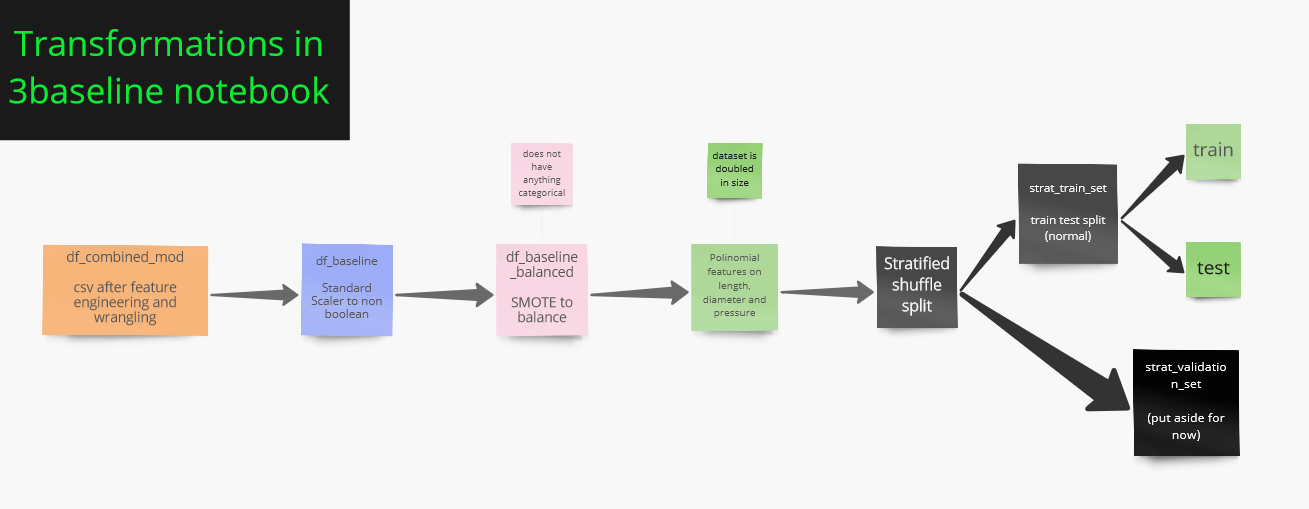

In [17]:
#do a split in df_baseline_balanced to create a train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_baseline_balanced.drop(['Incidence'], axis=1), df_baseline_balanced['Incidence'], test_size=0.2, random_state=42)


# Baselines FROM HERE!!!!

## Random Forest Classifier

In [22]:
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# define model
model = RandomForestClassifier()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['n_estimators'] = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
grid['max_depth'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
grid['min_samples_split'] = [2, 5, 10]
grid['min_samples_leaf'] = [1, 2, 4]
grid['max_features'] = ['auto', 'sqrt']
# define search
search = GridSearchCV(model, grid, scoring='roc_auc', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_train, y_train)

# summarize
print('Best Score: %s' % results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

: 

: 

In [18]:
#random forest classifier on train set, predict target on train and test set and show accuracy scores using all cores

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)
print('Accuracy score for train set:',accuracy_score(y_train, rfc_pred_train))
print('Accuracy score for test set:',accuracy_score(y_test, rfc_pred))




RandomForestClassifier(n_estimators=70, n_jobs=-1, random_state=42)

Accuracy score for train set: 1.0
Accuracy score for test set: 1.0


In [20]:
#test rfc in valiodation set
rfc_pred_val = rfc.predict(df_baseline_balanced.drop(['Incidence'], axis=1))
print('Accuracy score for validation set:',accuracy_score(df_baseline_balanced['Incidence'], rfc_pred_val))


Accuracy score for validation set: 1.0


In [21]:
#crossvalidation on validation set
from sklearn.model_selection import cross_val_score
rfc_cv = cross_val_score(rfc, df_baseline_balanced.drop(['Incidence'], axis=1), df_baseline_balanced['Incidence'], cv=5)
print('Cross validation score:',rfc_cv.mean())


KeyboardInterrupt: 

## Random Forest Classifier tuned
Goal is to avouid overfitting

In [ ]:
#rfc on train set using cross validation and predict target on train and test set and show accuracy scores using all cores
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=70, n_jobs=-1, random_state=42, max_depth=2, min_samples_leaf=8, min_samples_split=10, max_features=0.2)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)
print('Accuracy score for train set:',accuracy_score(y_train, rfc_pred_train))
print('Accuracy score for test set:',accuracy_score(y_test, rfc_pred))


In [ ]:

#do cross validation on train set
from sklearn.model_selection import cross_val_score
rfc_cv = cross_val_score(rfc, X_train, y_train, cv=5)
print('Cross validation score:',rfc_cv.mean())

#test rfc in valiodation set
rfc_pred_val = rfc.predict(strat_validation_set.drop(['Incidence'], axis=1))
print('Accuracy score for validation set:',accuracy_score(strat_validation_set['Incidence'], rfc_pred_val))

#crossvalidation on validation set
from sklearn.model_selection import cross_val_score 
rfc_cv = cross_val_score(rfc, strat_validation_set.drop(['Incidence'], axis=1), strat_validation_set['Incidence'], cv=5)    
print('Cross validation score:',rfc_cv.mean())

#rfc on train set using cross validation and predict target on train and test set and show accuracy scores using all cores
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=70, n_jobs=-1, random_state=42, max_depth=2, min_samples_leaf=8, min_samples_split=10, max_features=0.2)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_train)
print('Accuracy score for train set:',accuracy_score(y_train, rfc_pred_train))
print('Accuracy score for test set:',accuracy_score(y_test, rfc_pred))




In [ ]:
#rfc on train set, predict target on train and test set and show accuracy scores using all cores, increasing regularization parameter

from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=70, n_jobs=-1, random_state=42, max_depth=2, min_samples_leaf=8, min_samples_split=10, max_features=0.2)
rfc2.fit(X_train, y_train)
rfc2_pred = rfc2.predict(X_test)
rfc2_pred_train = rfc2.predict(X_train)
print('Accuracy score for train set:',accuracy_score(y_train, rfc2_pred_train))
print('Accuracy score for test set:',accuracy_score(y_test, rfc2_pred))


# The Graveyard

## Using Standard Scaler

In [ ]:
#Scaling data in df_baseline dataset except object columns and boolean values
cols_to_scale = ['Diameter', 'Length', 'Pressure', 'NumConnections','NumConnectionsUnder','Relative_Thickness', 'Age_of_Pipe_upon_inspection']
df_baseline[cols_to_scale] = StandardScaler().fit_transform(df_baseline[cols_to_scale])

df_baseline.head()


In [ ]:
#converting to absolute values 'NumConnections','NumConnectionsUnder','Relative_Thickness', 'Age_of_Pipe_upon_inspection'
df_baseline['NumConnections'] = df_baseline['NumConnections'].abs()
df_baseline['NumConnectionsUnder'] = df_baseline['NumConnectionsUnder'].abs()
df_baseline['Relative_Thickness'] = df_baseline['Relative_Thickness'].abs()
df_baseline['Age_of_Pipe_upon_inspection'] = df_baseline['Age_of_Pipe_upon_inspection'].abs()

df_baseline.head(1)

In [ ]:
#stratify Incidence variable to have a balanced dataset for the model
df_baseline['Incidence'].value_counts()

#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df_baseline.drop(['PipeId','Province', 'Town','Incidence'], axis=1), df_baseline['Incidence'], test_size=0.2, random_state=42, stratify=df_baseline['Incidence'])

#check the shape of the train and test datasets
X_train.shape
X_test.shape




In [ ]:
#use stratified shuffle split to split df_baseline_balanced into train and validation sets in a balanced way
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_baseline_balanced, df_baseline_balanced['Incidence']):
    strat_train_set = df_baseline_balanced.loc[train_index]
    strat_validation_set = df_baseline_balanced.loc[test_index]
strat_validation_set['Incidence'].value_counts()/len(strat_train_set)

strat_validation_set['Incidence'].value_counts()/len(strat_validation_set)

In [ ]:
#show the number of records for Incidence in each set
strat_train_set['Incidence'].value_counts()


In [ ]:
strat_validation_set['Incidence'].value_counts()
